In [1]:
import sys
sys.path.append('../')

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.style.reload_library()
plt.style.use(['science'])

## General Functions

In [4]:
def include_problem(p, problem):
    if problem == "all":
        return True
    elif problem in p:
        return True
    return False

In [5]:
def filter_dict_for_problem(d, problem):
    to_remove = []
    for p in d.keys():
        if include_problem(p, problem):
            continue
        else:
            to_remove.append(p)
    
    for k in to_remove:
        del d[k]
        
    return d

#### Data Generation + Supervised Learning Functions

In [6]:
def get_data_generation_df(results, problem="all"):
    res = results.copy()
    res = filter_dict_for_problem(res, problem)
    for p in res.keys():
        res[p] = res[p]['data_generation']
    df =  pd.DataFrame(res).T
    return df

In [7]:
def get_sl_df(results, problem="all"):
    res = results.copy()
    res = filter_dict_for_problem(res, problem)
    for p in res.keys():
        res[p] = res[p]['sl_results']
    df =  pd.DataFrame(res).T
    df = df.drop(['nn_tr_results', 'nn_val_results' ], axis=1)
    return df

In [8]:
# for renaming instances
problem_dict = {
    'cm_sl_2_2' : 'CM_0.5_0.5',
    'cm_sl_1_2' : 'CM_1.0_0.5',
    'cm_sl_2_1' : 'CM_0.5_1.0',
    'cm_sl_1_1' : 'CM_1.0_1.0',
    
    'vrp_l4_t20_v2_llf' : 'VRP_4_L',
    'vrp_l10_t30_v4_llf' : 'VRP_10_L',
    'vrp_l15_t50_v4_llf' : 'VRP_15_L',
    'vrp_l50_t100_v4_llf' : 'VRP_50_L',
    
    'vrp_l4_t20_v2_hlf' : 'VRP_4_H',
    'vrp_l10_t30_v4_hlf' : 'VRP_10_H',
    'vrp_l15_t50_v4_hlf' : 'VRP_15_H',
    'vrp_l50_t100_v4_hlf' : 'VRP_50_H',
}

problem_order = [
    'vrp_l4_t20_v2_llf', 'vrp_l10_t30_v4_llf', 'vrp_l15_t50_v4_llf', 'vrp_l50_t100_v4_llf',
    'vrp_l4_t20_v2_hlf', 'vrp_l10_t30_v4_hlf', 'vrp_l15_t50_v4_hlf', 'vrp_l50_t100_v4_hlf',
    'cm_sl_2_2', 'cm_sl_1_2', 'cm_sl_2_1', 'cm_sl_1_1',
]

## Load Results

In [9]:
data_dir = '../data/'
data_fp = data_dir + 'results.pkl'

In [10]:
# Read results
with open(data_fp, 'rb') as p:
    results = pickle.load(p)

# Data generation and training times

In [11]:
def latex_dg_stats(df_):
    """ Generate Latex table for data generation stats.  """
    df = df_.copy()

    df = df.reindex(problem_order)
    
    df.rename(
        index=problem_dict,
        columns={
            'time' : 'Time', 
            'n_samples_tr' : '# Train Samples',
            'n_samples_val' : '# Validation Samples',
        }, inplace=True)
    

    df = df.style.format(thousands=',', precision=2)

    latex_str = df.to_latex(column_format='l|lll').replace('_','\_').replace('nan', '-').replace('#', '\#')

    end_str = '}\n\\caption{Data generation samples and times. All times in seconds.}\n'
    end_str += '\\label{tab:dg_times}\n'
    end_str += '\\end{table*}' 

    latex_str2 = (latex_str.splitlines())
    latex_str2.insert(1, '\\toprule')
    latex_str2.insert(3, '\\midrule')
    latex_str2.insert(-1, '\\bottomrule')
    latex_str2.insert(0, '\\begin{table*}[t]\\centering\\resizebox{0.75\\textwidth}{!}{')
    latex_str2[-1] += end_str
    
    print("\n".join(latex_str2))
    print()

In [12]:
def latex_dg_times_T(df_):
    """ Generate Latex table for data generation stats.  """
    df = df_.copy()
    
    df = df.reindex(problem_order)
    
    df = df.T

    df = df.drop(['n_samples_tr', 'n_samples_val'])
    
    
    
    df.rename(
        columns=problem_dict,
        index={
            'time' : 'Time', 
        }, inplace=True)
    

    df = df.style.format(thousands=',', precision=2)

    latex_str = df.to_latex(column_format='l|llllllllllll').replace('_','\_').replace('nan', '-').replace('#', '\#')

    end_str = '}\n\\caption{Data generation samples and times. All times in seconds.}\n'
    end_str += '\\label{tab:dg_times}\n'
    end_str += '\\end{table*}' 

    latex_str2 = (latex_str.splitlines())
    latex_str2.insert(1, '\\toprule')
    latex_str2.insert(3, '\\midrule')
    latex_str2.insert(-1, '\\bottomrule')
    latex_str2.insert(0, '\\begin{table*}[t]\\centering\\resizebox{0.75\\textwidth}{!}{')
    latex_str2[-1] += end_str

    print("\n".join(latex_str2))
    print()

### Data Generation Tables

In [13]:
dg_df = get_data_generation_df(results, problem="all")

In [14]:
latex_dg_stats(dg_df)

\begin{table*}[t]\centering\resizebox{0.75\textwidth}{!}{
\begin{tabular}{l|lll}
\toprule
 & Time & \# Train Samples & \# Validation Samples \\
\midrule
VRP\_4\_L & 255.97 & 5,000.00 & 1,000.00 \\
VRP\_10\_L & 355.64 & 5,000.00 & 1,000.00 \\
VRP\_15\_L & 423.94 & 5,000.00 & 1,000.00 \\
VRP\_50\_L & 715.04 & 5,000.00 & 1,000.00 \\
VRP\_4\_H & 219.26 & 5,000.00 & 1,000.00 \\
VRP\_10\_H & 406.80 & 5,000.00 & 1,000.00 \\
VRP\_15\_H & 562.30 & 5,000.00 & 1,000.00 \\
VRP\_50\_H & 877.69 & 5,000.00 & 1,000.00 \\
CM\_0.5\_0.5 & 79.61 & 5,000.00 & 1,000.00 \\
CM\_1.0\_0.5 & 76.49 & 5,000.00 & 1,000.00 \\
CM\_0.5\_1.0 & 78.16 & 5,000.00 & 1,000.00 \\
CM\_1.0\_1.0 & 76.88 & 5,000.00 & 1,000.00 \\
\bottomrule
\end{tabular}}
\caption{Data generation samples and times. All times in seconds.}
\label{tab:dg_times}
\end{table*}



### Training Tables

In [15]:
def latex_tr_stats(df_):
    """ Generate Latex table for training stats.  """

    df = df_.copy()
    
    df = df.reindex(problem_order)
    
    df = df.drop(['lr_tr_mse', 'rf_tr_mse', 'nn_tr_mse', 'lr_val_mse', 'rf_val_mse', 'nn_val_mse'], axis=1)

    col_order = ['lr_tr_mae', 'rf_tr_mae', 'nn_tr_mae', 
                 'lr_val_mae', 'rf_val_mae', 'nn_val_mae',
                 'lr_time', 'rf_time', 'nn_time']
    df = df[col_order]
    
    df.rename(
        index = problem_dict,
        columns={
            'lr_tr_mae' : 'LR',
            'rf_tr_mae' : 'RF',
            'nn_tr_mae' : 'NN',
            'lr_val_mae' : 'LR\ ',
            'rf_val_mae' : 'RF\ ',
            'nn_val_mae' : 'NN\ ',
            'lr_time' : 'LR\ \ ',
            'rf_time' : 'RF\ \ ',
            'nn_time' : 'NN\ \ ',
        }, inplace=True)

    f = '{:.2f}'
    
    df = df.style.format(f)                
    df = df.highlight_min(subset=['LR', 'RF', 'NN'], props='textbf:--rwrap;', axis=1)
    df = df.highlight_min(subset=['LR\ ', 'RF\ ', 'NN\ '], props='textbf:--rwrap;', axis=1)
    df = df.highlight_min(subset=['LR\ \ ', 'RF\ \ ', 'NN\ \ '], props='textbf:--rwrap;', axis=1)
    
    
    end_str = '}\n\\caption{Training times and MAE.  All times in seconds.}\n'
    end_str += '\\label{tab:sl_metrics}\n'
    end_str += '\\end{table*}' 

    latex_str = df.to_latex(column_format='l|lll|lll|lll').replace('_','\_').replace('nan', '-').replace('#', '\#')

    latex_str2 = (latex_str.splitlines())
    latex_str2.insert(1, '\\toprule')
    latex_str2.insert(2, 'Instance & \multicolumn{3}{c}{Train MAE} & \multicolumn{3}{c}{Validation MAE} & \multicolumn{3}{c}{Times} \\\\')
    latex_str2.insert(3, '\cmidrule{2-10}')
    latex_str2.insert(5, '\\midrule')
    latex_str2.insert(-1, '\\bottomrule')
    latex_str2.insert(0, '\\begin{table*}[t]\\centering\\resizebox{0.9\\textwidth}{!}{')
    latex_str2[-1] += end_str #'}\end{table*}'#.insert(-1, '\\end{tabular}}')

    print("\n".join(latex_str2))
    print()

In [16]:
def latex_tr_stats(df_):
    """ Generate Latex table for training stats.  """

    df = df_.copy()
    
    df = df.reindex(problem_order)
    
    df = df.drop(['lr_tr_mse', 'rf_tr_mse', 'nn_tr_mse', 'lr_val_mse', 'rf_val_mse', 'nn_val_mse'], axis=1)

    col_order = ['lr_tr_mae', 'rf_tr_mae', 'nn_tr_mae', 
                 'lr_val_mae', 'rf_val_mae', 'nn_val_mae',
                 'lr_time', 'rf_time', 'nn_time']
    df = df[col_order]
    
    df.rename(
        index = problem_dict,
        columns={
            'lr_tr_mae' : 'LR',
            'rf_tr_mae' : 'RF',
            'nn_tr_mae' : 'NN',
            'lr_val_mae' : 'LR\ ',
            'rf_val_mae' : 'RF\ ',
            'nn_val_mae' : 'NN\ ',
            'lr_time' : 'LR\ \ ',
            'rf_time' : 'RF\ \ ',
            'nn_time' : 'NN\ \ ',
        }, inplace=True)

    f = '{:.2f}'
    
    df = df.style.format(f)                
    df = df.highlight_min(subset=['LR', 'RF', 'NN'], props='textbf:--rwrap;', axis=1)
    df = df.highlight_min(subset=['LR\ ', 'RF\ ', 'NN\ '], props='textbf:--rwrap;', axis=1)
    df = df.highlight_min(subset=['LR\ \ ', 'RF\ \ ', 'NN\ \ '], props='textbf:--rwrap;', axis=1)
    
    
    end_str = '}\n\\caption{Training times and MAE.  All times in seconds.}\n'
    end_str += '\\label{tab:sl_metrics}\n'
    end_str += '\\end{table*}' 

    latex_str = df.to_latex(column_format='l|lll|lll|lll').replace('_','\_').replace('nan', '-').replace('#', '\#')

    latex_str2 = (latex_str.splitlines())
    latex_str2.insert(1, '\\toprule')
    latex_str2.insert(2, 'Instance & \multicolumn{3}{c}{Train MAE} & \multicolumn{3}{c}{Validation MAE} & \multicolumn{3}{c}{Times} \\\\')
    latex_str2.insert(3, '\cmidrule{2-10}')
    latex_str2.insert(5, '\\midrule')
    latex_str2.insert(-1, '\\bottomrule')
    latex_str2.insert(0, '\\begin{table*}[t]\\centering\\resizebox{0.9\\textwidth}{!}{')
    latex_str2[-1] += end_str

    print("\n".join(latex_str2))
    print()

In [17]:
def latex_tr_stats_w_dg_time(df_):
    """ Generate Latex table for training stats + data generation time.  """

    df = df_.copy()
    
    df = df.reindex(problem_order)
    
    df = df.drop(['lr_tr_mse', 'rf_tr_mse', 'nn_tr_mse', 'lr_val_mse', 'rf_val_mse', 'nn_val_mse'], axis=1)

    col_order = ['lr_tr_mae', 'rf_tr_mae', 'nn_tr_mae', 
                 'lr_val_mae', 'rf_val_mae', 'nn_val_mae',
                 'lr_time', 'rf_time', 'nn_time', 'dg_time']
    df = df[col_order]
    
    df.rename(
        index = problem_dict,
        columns={
            'lr_tr_mae' : 'LR',
            'rf_tr_mae' : 'RF',
            'nn_tr_mae' : 'NN',
            'lr_val_mae' : 'LR\ ',
            'rf_val_mae' : 'RF\ ',
            'nn_val_mae' : 'NN\ ',
            'lr_time' : 'LR\ \ ',
            'rf_time' : 'RF\ \ ',
            'nn_time' : 'NN\ \ ',
            'dg_time' : 'Data',
        }, inplace=True)

    f = '{:.2f}'
    
    df = df.style.format(f)                
    df = df.highlight_min(subset=['LR', 'RF', 'NN'], props='textbf:--rwrap;', axis=1)
    df = df.highlight_min(subset=['LR\ ', 'RF\ ', 'NN\ '], props='textbf:--rwrap;', axis=1)
    df = df.highlight_min(subset=['LR\ \ ', 'RF\ \ ', 'NN\ \ '], props='textbf:--rwrap;', axis=1)
    
    
    end_str = '}\n\\caption{Validation MAE, training times, and data generation times.  All times in seconds.}\n'
    end_str += '\\label{tab:sl_metrics}\n'
    end_str += '\\end{table*}' 

    latex_str = df.to_latex(column_format='l|lll|lll|lll|l').replace('_','\_').replace('nan', '-').replace('#', '\#')

    latex_str2 = (latex_str.splitlines())
    latex_str2.insert(1, '\\toprule')
    latex_str2.insert(2, 'Instance & \multicolumn{3}{c}{Train MAE}  & \multicolumn{3}{c}{Validation MAE}  & \multicolumn{3}{c}{Times} & \\\\')
    latex_str2.insert(3, '\cmidrule{2-11}')
    latex_str2.insert(5, '\\midrule')
    latex_str2.insert(-1, '\\bottomrule')
    latex_str2.insert(0, '\\begin{table*}[t]\\centering\\resizebox{0.9\\textwidth}{!}{')
    latex_str2[-1] += end_str

    print("\n".join(latex_str2))
    print()

In [18]:
sl_df = get_sl_df(results)

In [19]:
# get table with data generation time
sl_df['dg_time'] = dg_df['time']

In [20]:
latex_tr_stats_w_dg_time(sl_df)

\begin{table*}[t]\centering\resizebox{0.9\textwidth}{!}{
\begin{tabular}{l|lll|lll|lll|l}
\toprule
Instance & \multicolumn{3}{c}{Train MAE}  & \multicolumn{3}{c}{Validation MAE}  & \multicolumn{3}{c}{Times} & \\
\cmidrule{2-11}
 & LR & RF & NN & LR\  & RF\  & NN\  & LR\ \  & RF\ \  & NN\ \  & Data \\
\midrule
VRP\_4\_L & 1.46 & 0.57 & \textbf{0.07} & 1.48 & 0.66 & \textbf{0.11} & \textbf{1.43} & 59.00 & 224.90 & 255.97 \\
VRP\_10\_L & 2.59 & 0.95 & \textbf{0.66} & 2.55 & 1.36 & \textbf{0.81} & \textbf{1.62} & 98.86 & 166.47 & 355.64 \\
VRP\_15\_L & 2.11 & 0.91 & \textbf{0.77} & 2.17 & 1.36 & \textbf{0.98} & \textbf{1.58} & 130.44 & 714.54 & 423.94 \\
VRP\_50\_L & 9.80 & \textbf{2.74} & 4.92 & 10.07 & 7.19 & \textbf{5.70} & \textbf{1.47} & 188.19 & 673.69 & 715.04 \\
VRP\_4\_H & 2.74 & 1.14 & \textbf{0.06} & 2.69 & 1.26 & \textbf{0.17} & \textbf{1.65} & 61.57 & 367.65 & 219.26 \\
VRP\_10\_H & 3.78 & 1.62 & \textbf{1.20} & 3.61 & 2.22 & \textbf{1.40} & \textbf{1.45} & 110.26 & 169.61 & 4

## Control Tables

In [21]:
def get_control_df(results, problem="all"):
    res = results.copy()
    res = filter_dict_for_problem(res, problem)
    for p in res.keys():
        res[p] = res[p]['control_results']
    df =  pd.DataFrame(res).T
    return df

In [22]:
def latex_control_cm_df(df_):
    """ Generate Latex table for control.  """
    df = df_.copy()
    cm_problem_order = list(filter(lambda x: "cm" in x, problem_order))
    df = df.reindex(cm_problem_order)
    

    col_order = ['dqn_linear_profit_mean', 'dqn_set_profit_mean', 'dpd_profit_mean', 'dlp_profit_mean', 'fcfs_profit_mean',
                 'dqn_linear_time_mean', 'dqn_set_time_mean','dpd_time_mean', 'dlp_time_mean', 'fcfs_time_mean',
                 'dqn_linear_offline_time', 'dqn_set_offline_time', 'dpd_offline_time', 'dlp_offline_time', 'fcfs_offline_time']
    df = df[col_order]
    
    
    df.rename(
        index = problem_dict,
        columns={
            'dqn_linear_profit_mean' : 'DQN-L',
            'dqn_set_profit_mean' : 'DQN-S',
            'dpd_profit_mean' : 'DPD',
            'dlp_profit_mean' : 'DLP',
            'fcfs_profit_mean' : 'FCFS',
            'dqn_linear_time_mean' : 'DQN-L\ ',
            'dqn_set_time_mean' : 'DQN-S\ ',
            'dpd_time_mean' : 'DPD\ ',
            'dlp_time_mean' : 'DLP\ ',
            'fcfs_time_mean' : 'FCFS\ ',
            'dqn_linear_offline_time' : 'DQN-L\ \ ',
            'dqn_set_offline_time' : 'DQN-S\ \ ',
            'dpd_offline_time' : 'DPD\ \ ',
            'dlp_offline_time' : 'DLP\ \ ',
            'fcfs_offline_time' : 'FCFS\ \ ',
        }, inplace=True)

    f = '{:.2f}'
    
    df = df.style.format(f)                
    df = df.highlight_max(subset=['DQN-L', 'DQN-S', 'DPD', 'DLP', 'FCFS'], props='textbf:--rwrap;', axis=1)
    df = df.highlight_min(subset=['DQN-L\ ','DQN-S\ ',   'DPD\ ', 'DLP\ ', 'FCFS\ '], props='textbf:--rwrap;', axis=1)
    df = df.highlight_min(subset=['DQN-L\ \ ','DQN-S\ \ ', 'DPD\ \ ', 'DLP\ \ ', 'FCFS\ \ '], props='textbf:--rwrap;', axis=1)
    
    end_str = '}\n\\caption{Cargo management control results.  Profit and online time averaged over 1000 trajectories.  All times in seconds.}\n'
    end_str += '\\label{tab:cm_control_results}\n'
    end_str += '\\end{table*}' 

    latex_str = df.to_latex(column_format='l|lllll|lllll|lllll').replace('_','\_').replace('nan', '-').replace('#', '\#')

    latex_str2 = (latex_str.splitlines())
    latex_str2.insert(1, '\\toprule')
    latex_str2.insert(2, 'Instance & \multicolumn{5}{c}{Mean Profits} & \multicolumn{5}{c}{Online Time} & \multicolumn{5}{c}{Offline Time} \\\\')
    latex_str2.insert(3, '\cmidrule{2-16}')
    latex_str2.insert(5, '\\midrule')
    latex_str2.insert(-1, '\\bottomrule')
    latex_str2.insert(0, '\\begin{table*}[t]\\centering\\resizebox{1.0\\textwidth}{!}{')
    latex_str2[-1] += end_str

    print("\n".join(latex_str2))
    print()

In [23]:
def latex_control_vrp_df(df_):
    """ Generate Latex table for control.  """
    df = df_.copy()
    vrp_problem_order = list(filter(lambda x: "vrp" in x, problem_order))
    df = df.reindex(vrp_problem_order)
    

    col_order = ['dqn_linear_profit_mean', 'dqn_set_profit_mean', 'blp_profit_mean', 'blpr_profit_mean', 'fcfs_profit_mean',
                 'dqn_linear_time_mean', 'dqn_set_time_mean', 'blp_time_mean', 'blpr_time_mean', 'fcfs_time_mean',
                 'dqn_linear_offline_time', 'dqn_set_offline_time', 'blp_offline_time', 'blpr_offline_time', 'fcfs_offline_time']
    df = df[col_order]
    
    
    df.rename(
        index = problem_dict,
        columns={
            'dqn_linear_profit_mean' : 'DQN-L',
            'dqn_set_profit_mean' : 'DQN-S',
            'blp_profit_mean' : 'BLP',
            'blpr_profit_mean' : 'BLPR',
            'fcfs_profit_mean' : 'FCFS',
            'dqn_linear_time_mean' : 'DQN-L\ ',
            'dqn_set_time_mean' : 'DQN-S\ ',
            'blp_time_mean' : 'BLP\ ',
            'blpr_time_mean' : 'BLPR\ ',
            'fcfs_time_mean' : 'FCFS\ ',
            'dqn_linear_offline_time' : 'DQN-L\ \ ',
            'dqn_set_offline_time' : 'DQN-S\ \ ',
            'blp_offline_time' : 'BLP\ \ ',
            'blpr_offline_time' : 'BLPR\ \ ',
            'fcfs_offline_time' : 'FCFS\ \ ',
        }, inplace=True)

    f = '{:.2f}'
    
    df = df.style.format(f)                
    df = df.highlight_max(subset=['DQN-L', 'DQN-S', 'BLP', 'BLPR', 'FCFS'], props='textbf:--rwrap;', axis=1)
    df = df.highlight_min(subset=['DQN-L\ ', 'DQN-S\ ', 'BLP\ ', 'BLPR\ ', 'FCFS\ '], props='textbf:--rwrap;', axis=1)
    df = df.highlight_min(subset=['DQN-L\ \ ', 'DQN-S\ \ ', 'BLP\ \ ', 'BLPR\ \ ', 'FCFS\ \ '], props='textbf:--rwrap;', axis=1)
    
    end_str = '}\n\\caption{Distributional logistics control results.  Profit and online time averaged over 1000 trajectories.  All times in seconds.}\n'
    end_str += '\\label{tab:vrp_control_results}\n'
    end_str += '\\end{table*}' 

    latex_str = df.to_latex(column_format='l|lllll|lllll|lllll').replace('_','\_').replace('nan', '-').replace('#', '\#')

    latex_str2 = (latex_str.splitlines())
    latex_str2.insert(1, '\\toprule')
    latex_str2.insert(2, 'Instance & \multicolumn{5}{c}{Mean Profits} & \multicolumn{5}{c}{Online Time} & \multicolumn{5}{c}{Offline Time} \\\\')
    latex_str2.insert(3, '\cmidrule{2-16}')
    latex_str2.insert(5, '\\midrule')
    latex_str2.insert(-1, '\\bottomrule')
    latex_str2.insert(0, '\\begin{table*}[t]\\centering\\resizebox{1.0\\textwidth}{!}{')
    latex_str2[-1] += end_str

    print("\n".join(latex_str2))
    print()

In [24]:
cm_control_df = get_control_df(results, problem="cm")

In [25]:
latex_control_cm_df(cm_control_df)

\begin{table*}[t]\centering\resizebox{1.0\textwidth}{!}{
\begin{tabular}{l|lllll|lllll|lllll}
\toprule
Instance & \multicolumn{5}{c}{Mean Profits} & \multicolumn{5}{c}{Online Time} & \multicolumn{5}{c}{Offline Time} \\
\cmidrule{2-16}
 & DQN-L & DQN-S & DPD & DLP & FCFS & DQN-L\  & DQN-S\  & DPD\  & DLP\  & FCFS\  & DQN-L\ \  & DQN-S\ \  & DPD\ \  & DLP\ \  & FCFS\ \  \\
\midrule
CM\_0.5\_0.5 & \textbf{6149.32} & 6018.14 & 6111.81 & 6100.18 & 3816.06 & 0.22 & 0.68 & 0.03 & \textbf{0.03} & 0.04 & 6596.54 & 11706.99 & 282.30 & 0.10 & \textbf{0.00} \\
CM\_1.0\_0.5 & 6429.87 & 6447.01 & \textbf{6559.94} & 6433.58 & 4341.09 & 0.24 & 0.20 & 0.03 & \textbf{0.02} & 0.04 & 6998.24 & 15031.88 & 457.66 & 0.06 & \textbf{0.00} \\
CM\_0.5\_1.0 & 6376.83 & 6434.75 & \textbf{6538.72} & 6421.70 & 4282.58 & 0.24 & 0.24 & \textbf{0.03} & 0.03 & 0.04 & 7699.69 & 9390.03 & 386.40 & 0.06 & \textbf{0.00} \\
CM\_1.0\_1.0 & 9868.78 & \textbf{9922.73} & 9851.77 & 9306.05 & 9306.05 & 0.26 & 0.71 & \textbf{0.04} 

In [26]:
vrp_control_df = get_control_df(results, problem="vrp")

In [27]:
latex_control_vrp_df(vrp_control_df)

\begin{table*}[t]\centering\resizebox{1.0\textwidth}{!}{
\begin{tabular}{l|lllll|lllll|lllll}
\toprule
Instance & \multicolumn{5}{c}{Mean Profits} & \multicolumn{5}{c}{Online Time} & \multicolumn{5}{c}{Offline Time} \\
\cmidrule{2-16}
 & DQN-L & DQN-S & BLP & BLPR & FCFS & DQN-L\  & DQN-S\  & BLP\  & BLPR\  & FCFS\  & DQN-L\ \  & DQN-S\ \  & BLP\ \  & BLPR\ \  & FCFS\ \  \\
\midrule
VRP\_4\_L & 101.43 & \textbf{102.62} & 77.12 & 78.68 & 70.23 & 0.78 & 0.86 & \textbf{0.01} & 0.11 & 0.82 & 2346.77 & 2729.76 & 0.12 & \textbf{0.10} & - \\
VRP\_10\_L & 246.90 & \textbf{247.98} & 125.57 & 127.69 & 243.45 & 2.25 & 2.34 & \textbf{0.09} & 0.26 & 2.25 & 3408.00 & 5332.27 & 0.13 & \textbf{0.13} & - \\
VRP\_15\_L & 464.45 & \textbf{468.72} & 142.86 & 141.39 & 451.04 & 2.84 & 2.75 & \textbf{0.19} & 0.34 & 2.58 & 8095.51 & 8488.91 & 0.21 & \textbf{0.21} & - \\
VRP\_50\_L & 1402.54 & \textbf{1420.86} & 190.92 & 186.30 & 1372.15 & 4.10 & 3.40 & \textbf{1.00} & 2.76 & 3.15 & 16715.84 & 21667.25 & \text

# Control Box Plots

In [28]:
def get_best_known_profits(r_, problem):
    results = r_.copy()
    
    if "cm" in problem:
        algos = ['dqn_linear', 'dqn_set', 'dlp', 'dpd', 'fcfs']
    elif "vrp" in problem:
        algos =  ['dqn_linear', 'dqn_set', 'blp', 'blpr', 'fcfs'] 
        
    n_eval_eps = len(results[problem]['control_results'][f'{algos[0]}_profits'])
    
    best_profits = []
    for i in range(n_eval_eps):
        profit_i = []
        for algo in algos:
            if isinstance(results[problem]['control_results'][f'{algo}_profits'] , list):
                profit_i.append(results[problem]['control_results'][f'{algo}_profits'][i])
        best_profits.append(np.max(profit_i))
            
    return best_profits

In [29]:
def get_opt_gaps(r_,  problem):
    def get_gap(x, y):
        return 100 * np.abs((y - x)) / np.abs(x)
        
    if "cm" in problem:
        algos = ['dqn_linear', 'dqn_set', 'dlp', 'dpd', 'fcfs']
    elif "vrp" in problem:
        algos = ['dqn_linear', 'dqn_set', 'blp', 'blpr', 'fcfs'] 
        
    results = r_.copy()
    best_profits = get_best_known_profits(results, problem)
    
    gaps = {}
    n_eval_eps = len(best_profits)
    
    for algo in algos:
        algo_gaps = []
        for i in range(n_eval_eps):
            if isinstance(results[problem]['control_results'][f'{algo}_profits'] , list):
                algo_profit = results[problem]['control_results'][f'{algo}_profits'][i]
                algo_gaps.append(get_gap(algo_profit, best_profits[i]))
            else:
                algo_gaps.append(0)

        gaps[algo] = algo_gaps
        
    return gaps


In [30]:
def get_gap_dict(r_, problem_type = "all"):
    results = r_.copy()
    results = filter_dict_for_problem(results, problem_type)

    
    gap_dict = {}
    for problem in results.keys():
        gap_dict[problem] = get_opt_gaps(results, problem)
        
    return gap_dict

In [31]:
gap_dict = get_gap_dict(results, "vrp")


## Cargo Management

In [32]:
gap_dict = get_gap_dict(results, "cm")
insts = list(filter(lambda x: "cm" in x, problem_order))

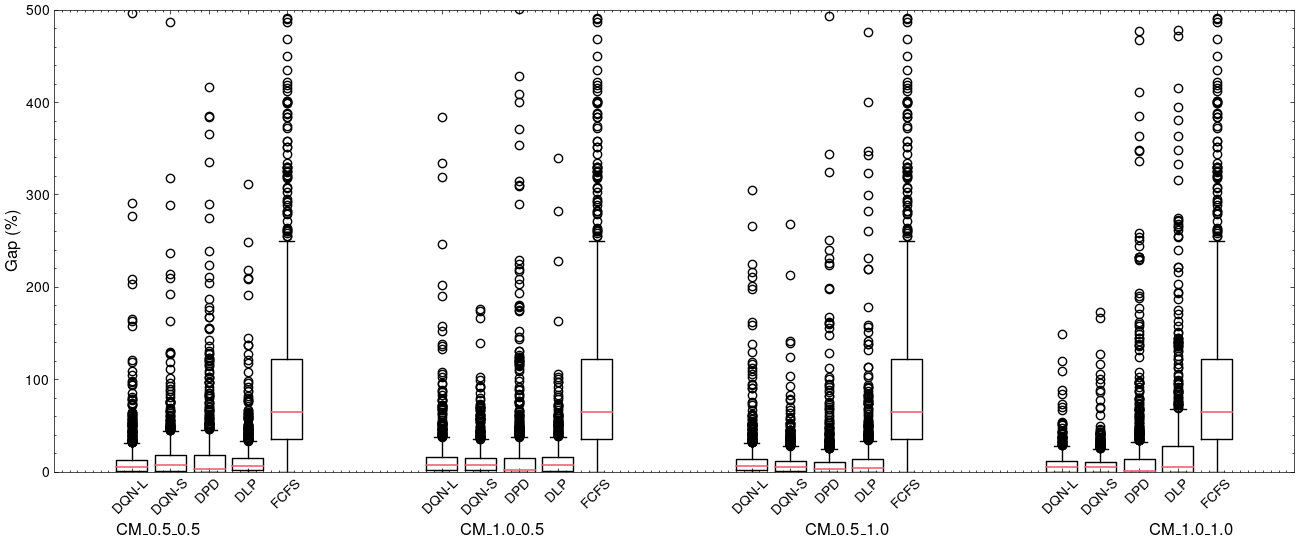

In [33]:
with plt.style.context(['science', 'nature', 'bright']):
    fig, ax = plt.subplots(figsize=(16,6))
    ax.autoscale(tight=True)
    ax.boxplot(
        [gap_dict[insts[0]]['dqn_linear'], gap_dict[insts[0]]['dqn_set'], gap_dict[insts[0]]['dpd'], gap_dict[insts[0]]['dlp'], gap_dict[insts[0]]['fcfs'],
         gap_dict[insts[1]]['dqn_linear'], gap_dict[insts[1]]['dqn_set'], gap_dict[insts[1]]['dpd'], gap_dict[insts[1]]['dlp'], gap_dict[insts[0]]['fcfs'],
         gap_dict[insts[2]]['dqn_linear'], gap_dict[insts[2]]['dqn_set'], gap_dict[insts[2]]['dpd'], gap_dict[insts[2]]['dlp'], gap_dict[insts[0]]['fcfs'],
         gap_dict[insts[3]]['dqn_linear'], gap_dict[insts[3]]['dqn_set'], gap_dict[insts[3]]['dpd'], gap_dict[insts[3]]['dlp'], gap_dict[insts[0]]['fcfs'],
        ], 
             labels=['DQN-L', 'DQN-S', 'DPD', 'DLP', 'FCFS', 
                     'DQN-L', 'DQN-S', 'DPD', 'DLP', 'FCFS', 
                     'DQN-L', 'DQN-S', 'DPD', 'DLP', 'FCFS', 
                     'DQN-L', 'DQN-S', 'DPD', 'DLP', 'FCFS', ],
             positions=[0.25, 0.5, 0.75, 1.0, 1.25,
                        2.25, 2.5, 2.75, 3.0, 3.25,
                        4.25, 4.5, 4.75, 5.0, 5.25,
                        6.25, 6.5, 6.75, 7.0, 7.25,
                       ],
             medianprops=dict(linewidth=1.2),
             widths=0.2)
    
    plt.xticks(fontsize=10, rotation = 45)
    plt.yticks(fontsize=10)
    
    ax.set_ylabel('Gap (\%)', fontsize=12)
    ax.set_xlabel('CM\_0.5\_0.5\hspace{6.5cm} CM\_1.0\_0.5\hspace{6.5cm} CM\_0.5\_1.0\hspace{6.5cm} CM\_1.0\_1.0', fontsize=12)
    
    ax.set_ylim(0,500)

    plt.show()

## VRP

In [34]:
gap_dict = get_gap_dict(results, "vrp")

insts = list(filter(lambda x: "vrp" in x, problem_order))

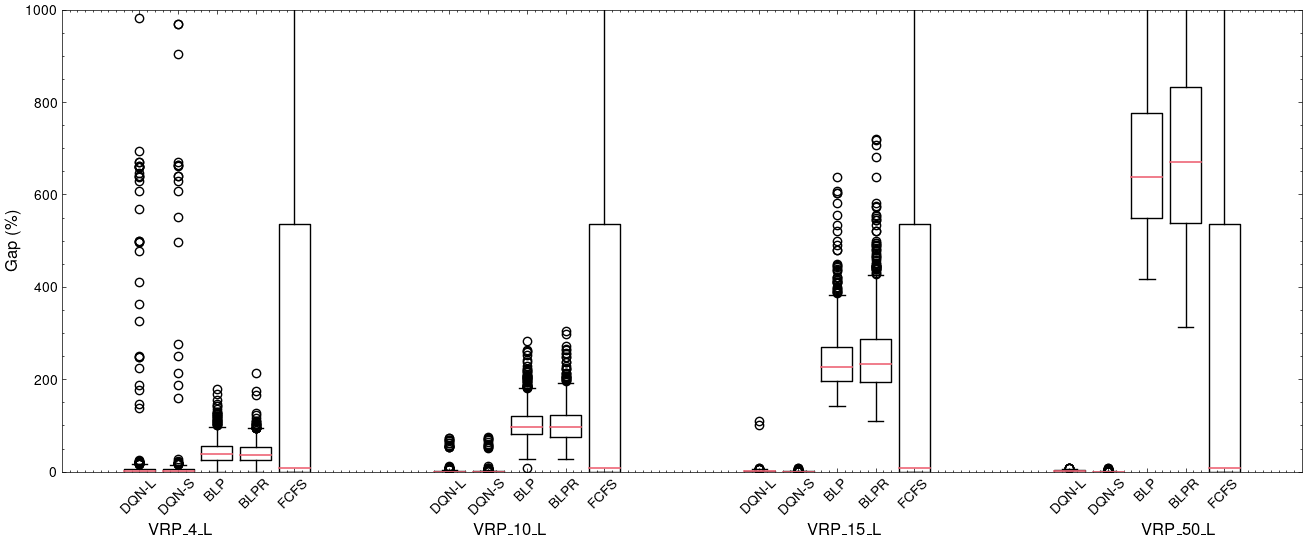

In [35]:
with plt.style.context(['science', 'nature', 'bright']):
    fig, ax = plt.subplots(figsize=(16,6))
    ax.autoscale(tight=True)
    ax.boxplot(
        [gap_dict[insts[0]]['dqn_linear'], gap_dict[insts[0]]['dqn_set'], gap_dict[insts[0]]['blp'], gap_dict[insts[0]]['blpr'], gap_dict[insts[0]]['fcfs'],
         gap_dict[insts[1]]['dqn_linear'], gap_dict[insts[1]]['dqn_set'], gap_dict[insts[1]]['blp'], gap_dict[insts[1]]['blpr'], gap_dict[insts[0]]['fcfs'],
         gap_dict[insts[2]]['dqn_linear'], gap_dict[insts[2]]['dqn_set'], gap_dict[insts[2]]['blp'], gap_dict[insts[2]]['blpr'], gap_dict[insts[0]]['fcfs'],
         gap_dict[insts[3]]['dqn_linear'], gap_dict[insts[3]]['dqn_set'], gap_dict[insts[3]]['blp'], gap_dict[insts[3]]['blpr'], gap_dict[insts[0]]['fcfs'],
        ], 
             labels=['DQN-L', 'DQN-S', 'BLP', 'BLPR', 'FCFS',  
                     'DQN-L', 'DQN-S', 'BLP', 'BLPR', 'FCFS',  
                     'DQN-L', 'DQN-S', 'BLP', 'BLPR', 'FCFS',  
                     'DQN-L', 'DQN-S', 'BLP', 'BLPR', 'FCFS'],
             positions=[0.25, 0.5, 0.75, 1.0, 1.25,
                        2.25, 2.5, 2.75, 3.0, 3.25,
                        4.25, 4.5, 4.75, 5.0, 5.25, 
                        6.25, 6.5, 6.75, 7.0, 7.25
                       ],
             medianprops=dict(linewidth=1.2),
             widths=0.2)
    
    plt.xticks(fontsize=10, rotation = 45)
    plt.yticks(fontsize=10)
    
    ax.set_ylabel('Gap (\%)', fontsize=12)
    ax.set_xlabel('VRP_4_L\hspace{6.5cm} VRP_10_L\hspace{6.5cm} VRP_15_L\hspace{6.5cm} VRP_50_L', fontsize=12)
    
    ax.set_ylim(0,1000)

 
    plt.show()

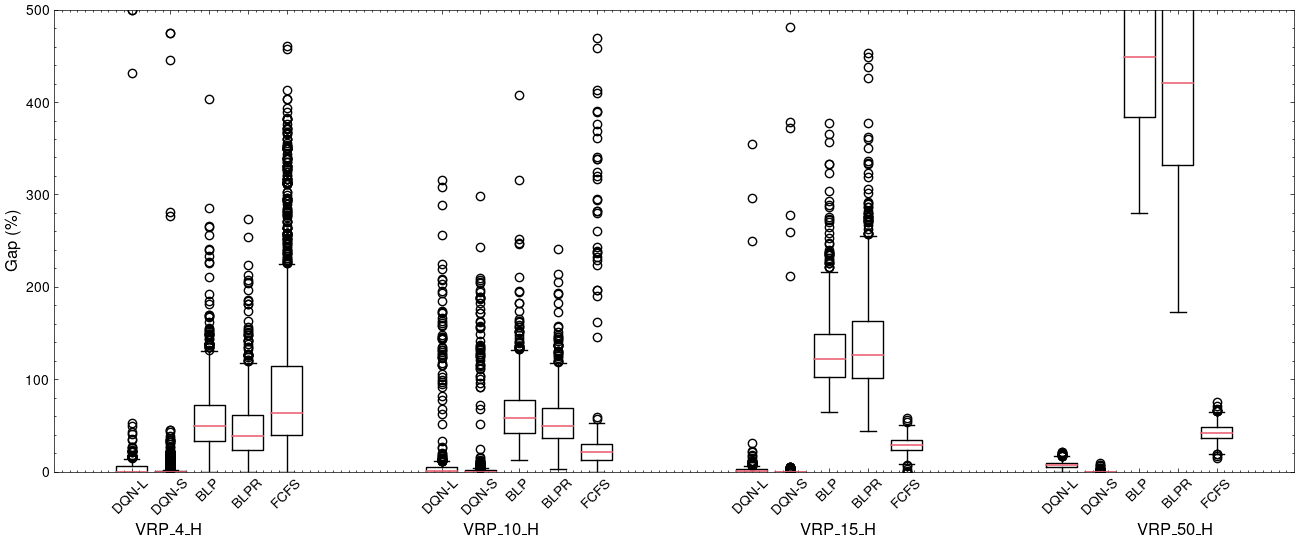

In [36]:
with plt.style.context(['science', 'nature', 'bright']):
    fig, ax = plt.subplots(figsize=(16,6))
    ax.autoscale(tight=True)
    ax.boxplot(
        [gap_dict[insts[4]]['dqn_linear'], gap_dict[insts[4]]['dqn_set'], gap_dict[insts[4]]['blp'], gap_dict[insts[4]]['blpr'], gap_dict[insts[4]]['fcfs'],
         gap_dict[insts[5]]['dqn_linear'], gap_dict[insts[5]]['dqn_set'], gap_dict[insts[5]]['blp'], gap_dict[insts[5]]['blpr'], gap_dict[insts[5]]['fcfs'],
         gap_dict[insts[6]]['dqn_linear'], gap_dict[insts[6]]['dqn_set'], gap_dict[insts[6]]['blp'], gap_dict[insts[6]]['blpr'], gap_dict[insts[6]]['fcfs'],
         gap_dict[insts[7]]['dqn_linear'], gap_dict[insts[7]]['dqn_set'], gap_dict[insts[7]]['blp'], gap_dict[insts[7]]['blpr'], gap_dict[insts[7]]['fcfs'],
        ], 
             labels=['DQN-L', 'DQN-S', 'BLP', 'BLPR', 'FCFS',  
                     'DQN-L', 'DQN-S', 'BLP', 'BLPR', 'FCFS',  
                     'DQN-L', 'DQN-S', 'BLP', 'BLPR', 'FCFS',  
                     'DQN-L', 'DQN-S', 'BLP', 'BLPR', 'FCFS'],
             positions=[0.25, 0.5, 0.75, 1.0, 1.25,
                        2.25, 2.5, 2.75, 3.0, 3.25,
                        4.25, 4.5, 4.75, 5.0, 5.25, 
                        6.25, 6.5, 6.75, 7.0, 7.25
                       ],
             medianprops=dict(linewidth=1.2),
             widths=0.2)
    
    plt.xticks(fontsize=10, rotation = 45)
    plt.yticks(fontsize=10)
    
    ax.set_ylabel('Gap (\%)', fontsize=12)
    ax.set_xlabel('VRP_4_H\hspace{6.5cm} VRP_10_H\hspace{6.5cm} VRP_15_H\hspace{6.5cm} VRP_50_H', fontsize=12)
    ax.set_ylim(0,500)

 
    plt.show()